<a href="https://www.kaggle.com/code/hnglng/data-mining-k-medoid-clustering?scriptVersionId=178063589" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Create a DataFrame from the data
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

# Add the target variable to the DataFrame
df['target'] = breast_cancer.target

# Optionally, map the target variable to the target names
df['target_names'] = df['target'].map(lambda x: breast_cancer.target_names[x])

# Display the first few rows of the DataFrame
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0          

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target', 'target_names'],
      dtype='object')

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
target_names               0
dtype: int64

In [7]:
numeric_columns = df.drop(columns=['target', 'target_names'])
mean_columns = numeric_columns.filter(regex='^mean')
mean_columns

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


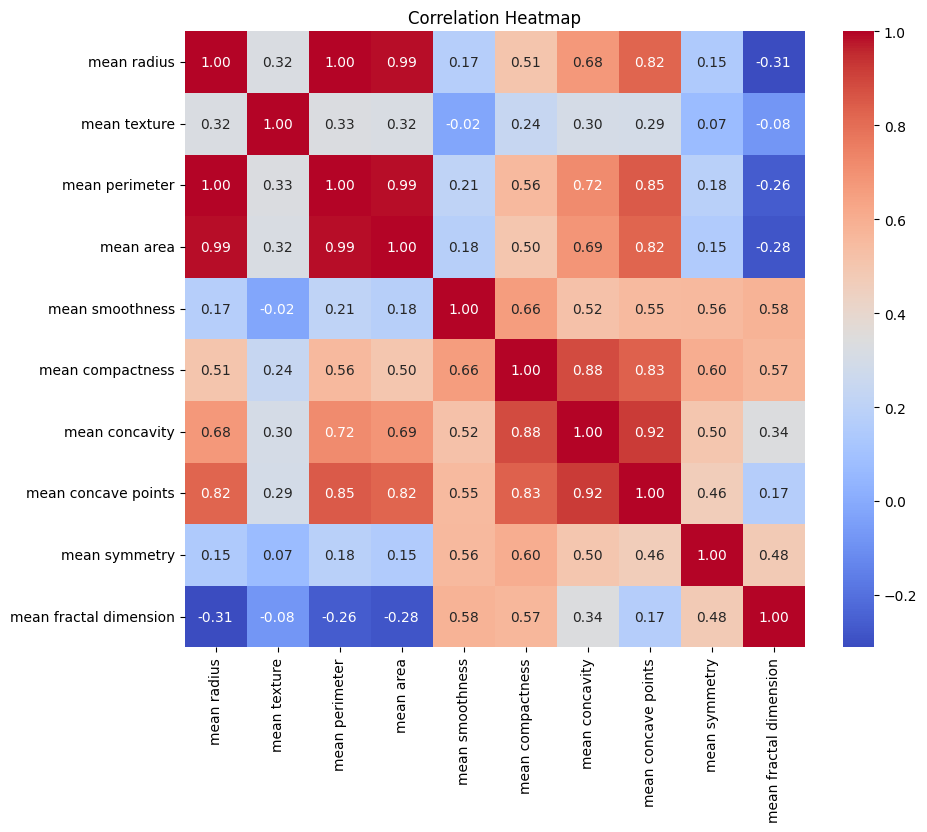

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df = mean_columns.corr()


# Assuming corr_df is your correlation DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Lặp qua từng cặp cột trong ma trận tương quan
for i in range(len(corr_df.columns)):
    for j in range(i+1, len(corr_df.columns)):
        col1 = corr_df.columns[i]
        col2 = corr_df.columns[j]
        
        # Nếu hệ số tương quan giữa cặp cột lớn hơn 0.6
        if abs(corr_df.loc[col1, col2]) > 0.6:
            # Loại bỏ một trong hai cột
            if col1 in mean_columns.columns:
                mean_columns.drop(columns=[col1], inplace=True)
            elif col2 in mean_columns.columns:
                mean_columns.drop(columns=[col2], inplace=True)

# Hiển thị DataFrame sau khi loại bỏ các cột không cần thiết
print(mean_columns)

     mean texture  mean fractal dimension
0           10.38                 0.07871
1           17.77                 0.05667
2           21.25                 0.05999
3           20.38                 0.09744
4           14.34                 0.05883
..            ...                     ...
564         22.39                 0.05623
565         28.25                 0.05533
566         28.08                 0.05648
567         29.33                 0.07016
568         24.54                 0.05884

[569 rows x 2 columns]


/tmp/ipykernel_18/2360883728.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_columns.drop(columns=[col1], inplace=True)
/tmp/ipykernel_18/2360883728.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_columns.drop(columns=[col2], inplace=True)
/tmp/ipykernel_18/2360883728.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_columns.drop(columns=[col2], inplace=True)
/tmp/ipykernel_18/2360883728.py:13: SettingWithCo

In [10]:
mean_columns.columns

Index(['mean texture', 'mean fractal dimension'], dtype='object')

In [11]:
import numpy as np
from typing import List, Tuple

def k_means_clustering(
    data: np.ndarray, k: int, max_iter: int = 100, random_seed=0
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    data: input array
    k: number of clusters
    max_iter: upper bound of iteration
    """
    np.random.seed(random_seed)
    N = data.shape[0]
    centroids = data[np.random.choice(N, k, replace=False), :]
    cluster_center_history = [centroids.copy()]

    # labels = np.empty(N)
    distances = np.linalg.norm(data[:, None, :] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    labels_history = [labels.copy()]
    
    old_labels = np.empty(N)
    for i in range(max_iter):
        distances = np.linalg.norm(data[:, None, :] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        for j in range(k):
            centroids[j] = np.mean(data[labels == j], axis=0)
        cluster_center_history.append(centroids.copy())
        labels_history.append(labels.copy())
        # terminate if cluster assignment never changed from the step before
        if i > 0 and np.all(labels == old_labels):
            break

        old_labels = labels
    print(f"* converged after {i + 1} iterations")
    cluster_center_history = np.array(cluster_center_history)
    labels_history = np.array(labels_history)
    
    return labels, centroids, cluster_center_history, labels_history


In [12]:
import numpy as np
from typing import List, Tuple

def k_medoids_clustering(
    data: np.ndarray, k: int, max_iter=100, random_seed=42
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    k-medoid clustering with voronoi iteration
    """
    # Step 1: Initialization
    np.random.seed(random_seed)
    N = data.shape[0]
    medoids_idx = np.random.choice(N, k, replace=False)
    medoids = data[medoids_idx].copy()
    distances = np.zeros((N, k))
    medoid_history = [medoids.copy()]

    for i in range(k):
        distances[:, i] = np.sum(np.abs(data - medoids[i]), axis=1)

    # Assign each non-medoid data point to the closest medoid
    labels = np.argmin(distances, axis=1)
    labels_history = [labels.copy()]
    old_labels = np.empty(N)
    all_idxs = np.arange(N)

    # Step 2: Update
    for it in range(max_iter):
        best_swap = (-1, -1, 0)
        best_distances = np.zeros(N)
        for i in range(k):
            # Compute the cost of swapping medoid and non-medoid data points
            non_medoids_idx = all_idxs[np.logical_not(np.isin(all_idxs, medoids_idx))]
            for j in non_medoids_idx:
                new_medoid = data[j]
                new_distances = np.sum(np.abs(data - new_medoid), axis=1)
                cost_change = np.sum(new_distances[labels == i]) - np.sum(
                    distances[labels == i, i]
                )
                if cost_change < best_swap[2]:
                    best_swap = (i, j, cost_change)
                    best_distances = new_distances
        if best_swap == (-1, -1, 0):
            break

        i, j, _ = best_swap
        distances[:, i] = best_distances
        medoids[i] = data[j]

        labels = np.argmin(distances, axis=1)
        labels_history.append(labels.copy())
        medoid_history.append(medoids.copy())

        old_labels = labels
    print(f"* converged after {it + 1} iterations")
    medoid_history = np.array(medoid_history)
    labels_history = np.array(labels_history)
    
    return labels, medoids, medoid_history, labels_history


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

* converged after 6 iterations


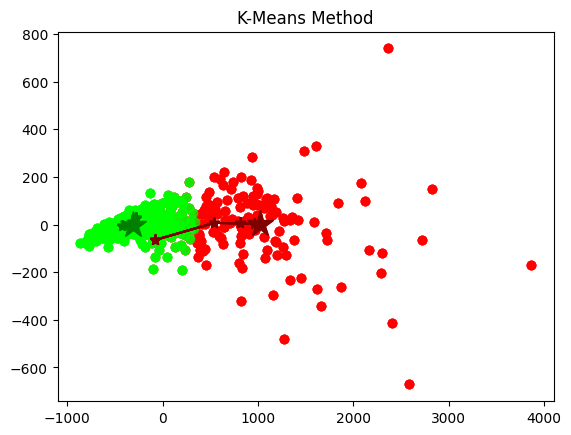

In [14]:
breast_cancer = datasets.load_breast_cancer()
num_classes=len(breast_cancer["target_names"])
random_seed=0
data = breast_cancer["data"]
max_iter=100

colors = [
        (1, 0, 0),
        (0, 1, 0),
        (0, 0, 1),
    ]
centroid_colors = [
    (0.5, 0, 0),
    (0, 0.5, 0),
    (0, 0, 0.5),
]

labels, centroids, cluster_center_history, labels_history = k_means_clustering(
    data, k=num_classes, random_seed=random_seed, max_iter=max_iter
)
pca = PCA(n_components=2, random_state=42).fit(data)
X_reduced = pca.transform(data)

fig, ax = plt.subplots()
ax.set(
        title=f"K-Means Method",
    )

for i in range(cluster_center_history.shape[0]):
    labels = labels_history[i]
    accuracy = sum(labels == breast_cancer["target"])/len(breast_cancer["target"])
    for k in range(num_classes):
        idxs = np.where(labels == k)[0]
        ax.scatter(X_reduced[idxs, 0], X_reduced[idxs, 1], color=colors[k], alpha=0.5)

        centroids_ = pca.transform(cluster_center_history[:i+1, k, :])
        ax.plot(
            centroids_[:, 0],
            centroids_[:, 1],
            marker="*",
            color=centroid_colors[k],
            markersize=8,
        )

centroids_ = pca.transform(centroids)
for k in range(num_classes):
    ax.plot(
        centroids_[k, 0],
        centroids_[k, 1],
        marker="*",
        color=centroid_colors[k],
        markersize=20,
    )

plt.show()


* converged after 5 iterations


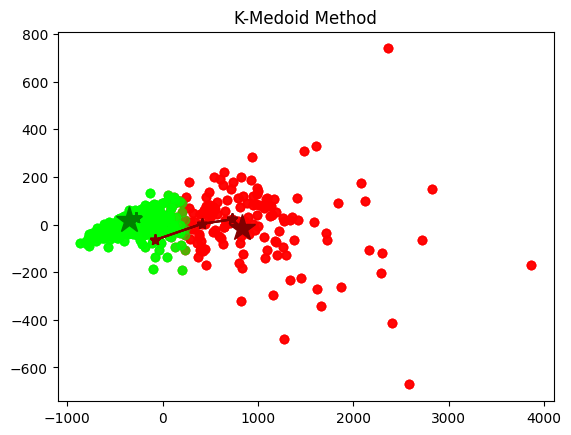

In [15]:
breast_cancer = datasets.load_breast_cancer()
num_classes=len(breast_cancer["target_names"])
random_seed=0
data = breast_cancer["data"]
max_iter=100

colors = [
        (1, 0, 0),
        (0, 1, 0),
        (0, 0, 1),
    ]
centroid_colors = [
    (0.5, 0, 0),
    (0, 0.5, 0),
    (0, 0, 0.5),
]

labels, centroids, cluster_center_history, labels_history = k_medoids_clustering(
    data, k=num_classes, random_seed=random_seed, max_iter=max_iter
)
pca = PCA(n_components=2, random_state=42).fit(data)
X_reduced = pca.transform(data)

fig, ax = plt.subplots()
ax.set(
        title=f"K-Medoid Method",
    )

for i in range(cluster_center_history.shape[0]):
    labels = labels_history[i]
    accuracy = sum(labels == breast_cancer["target"])/len(breast_cancer["target"])
    for k in range(num_classes):
        idxs = np.where(labels == k)[0]
        ax.scatter(X_reduced[idxs, 0], X_reduced[idxs, 1], color=colors[k], alpha=0.5)

        centroids_ = pca.transform(cluster_center_history[:i+1, k, :])
        ax.plot(
            centroids_[:, 0],
            centroids_[:, 1],
            marker="*",
            color=centroid_colors[k],
            markersize=8,
        )

centroids_ = pca.transform(centroids)
for k in range(num_classes):
    ax.plot(
        centroids_[k, 0],
        centroids_[k, 1],
        marker="*",
        color=centroid_colors[k],
        markersize=20,
    )

plt.show()


In [16]:
import pandas as pd

# Tạo DataFrame từ dữ liệu và nhãn
cluster_data = pd.DataFrame(data, columns=breast_cancer.feature_names)
cluster_data['label'] = labels

# Phân chia dữ liệu thành hai nhóm dựa trên nhãn
group1 = cluster_data[cluster_data['label'] == 0]
group2 = cluster_data[cluster_data['label'] == 1]

# Hiển thị hai nhóm dữ liệu
print("Group 1:")
print(group1.head())

print("\nGroup 2:")
print(group2.head())


Group 1:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   
4        20.29         14.34           135.1     1297.0          0.10030   
6        18.25         19.98           119.6     1040.0          0.09463   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
4           0.13280          0.1980              0.10430         0.1809   
6           0.10900          0.1127              0.07400         0.1794   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0    

In [17]:
group1[['mean texture', 'mean fractal dimension']].describe()

,mean texture,mean fractal dimension
count,140.000000,140.000000
mean,21.739643,0.060420
std,3.872153,0.006589
min,10.380000,0.049960
25%,19.427500,0.055560
50%,21.405000,0.059825
75%,23.972500,0.063092
max,39.280000,0.081420


In [18]:
group2[['mean texture', 'mean fractal dimension']].describe()

,mean texture,mean fractal dimension
count,429.000000,429.000000
mean,18.490117,0.063573
std,4.132357,0.007043
min,9.710000,0.051850
25%,15.620000,0.058830
50%,18.030000,0.062280
75%,20.780000,0.066690
max,33.810000,0.097440
